Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
phi = PolynomialFeatures(degree=1).fit_transform(X)
print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
phi_t = np.transpose(phi)
gram = np.dot(phi_t, phi)
inv_gram = linalg.inv(gram)
w = np.dot(np.dot(inv_gram, phi_t), y)
print(w)
pi_phi = linalg.pinv(phi)
pi_w = np.dot(pi_phi, y)
print(pi_w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

mean squared error:  2.042857142857143
E(h|D):  4.085714285714286


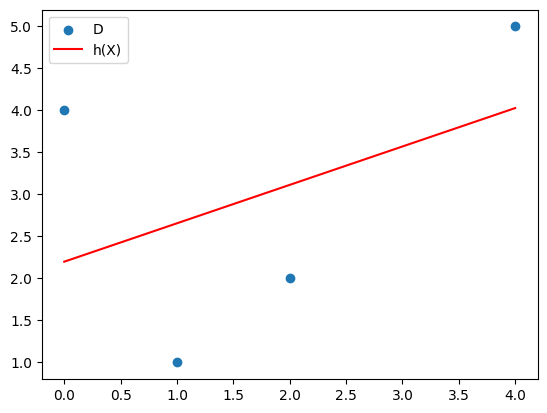

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = np.dot(phi, w)
plt.scatter(X, y, label='D')
plt.plot(X, h, label='h(X)', color='red')
mse = mean_squared_error(y, h)
E_h_d = 0.5 * sum(pow(y - h, 2))
plt.legend()
print('mean squared error: ', mse)
print('E(h|D): ', E_h_d)

 ### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
try:
    np.dot(linalg.inv(phi), y)
except linalg.LinAlgError as err:
    print(err)

phi2 = PolynomialFeatures(degree=3).fit_transform(X)
print(phi2)
w2 = np.dot(linalg.inv(phi2), y)
print(w2)
    

Last 2 dimensions of the array must be square
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

lr = LinearRegression().fit(phi, y)
w_lr = [lr.intercept_, round(lr.coef_[1], 8)]
print(w)
print(w_lr)

h2 = lr.predict(phi)
print(h2)
print(h)
lr_err = mean_squared_error(y, h2)
print('Jednakost pogreške učenja dvaju modela: ',lr_err == mse)

[2.2        0.45714286]
[2.2, 0.45714286]
[2.2        2.65714286 3.11428571 4.02857143]
[2.2        2.65714286 3.11428571 4.02857143]
Jednakost pogreške učenja dvaju modela:  True


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, X.shape)

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
def function(x):
    return 5 + x - 2 * pow(x, 2) - 5 * pow(x, 3)

dataset = make_instances(-5, 5, 50)
noise = 200
labels = make_labels(dataset, function, noise)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

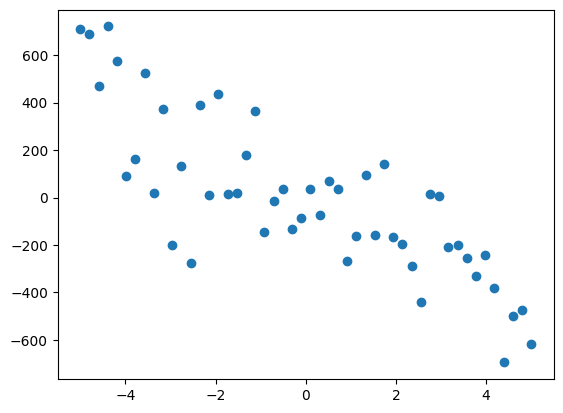

In [11]:
# Vaš kôd ovdje
plt.scatter(dataset, labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

30072.667442631348


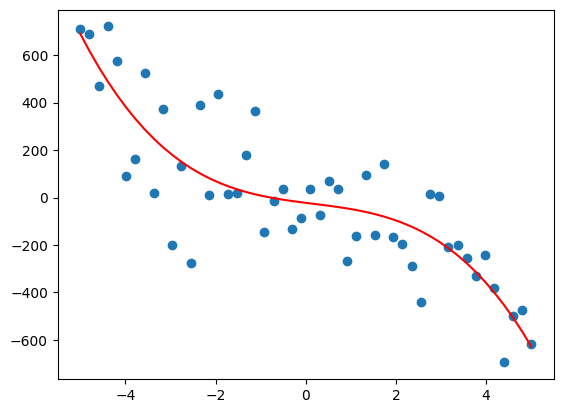

In [12]:
# Vaš kôd ovdje
phi_ds = PolynomialFeatures(degree=3).fit_transform(dataset)
phi_ds_t = np.transpose(phi_ds)
gram_ds = np.dot(phi_ds_t, phi_ds)
inv_gram_ds = linalg.inv(gram_ds)
w_ds = np.dot(np.dot(inv_gram_ds, phi_ds_t), labels)
h_ds = np.dot(phi_ds, w_ds)
mse_ds = mean_squared_error(labels, h_ds)
plt.plot(dataset, h_ds, color='red')
plt.scatter(dataset, labels)
print(mse_ds)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Text(0, 0.5, 'Labels')

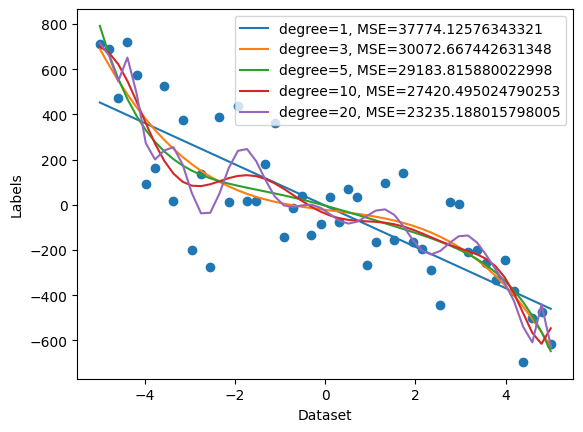

In [13]:
# Vaš kôd ovdje
degrees = [1, 3, 5, 10, 20]
plt.scatter(dataset, labels)
for degree in degrees:
    phi_ds = PolynomialFeatures(degree=degree).fit_transform(dataset)
    model = LinearRegression()
    model.fit(phi_ds, labels)
    h_ds = model.predict(phi_ds)
    mse_ds = mean_squared_error(labels, h_ds)
    plt.plot(dataset, h_ds, label=f'degree={degree}, MSE={mse_ds}')
plt.legend()
plt.xlabel('Dataset')
plt.ylabel('Labels')

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

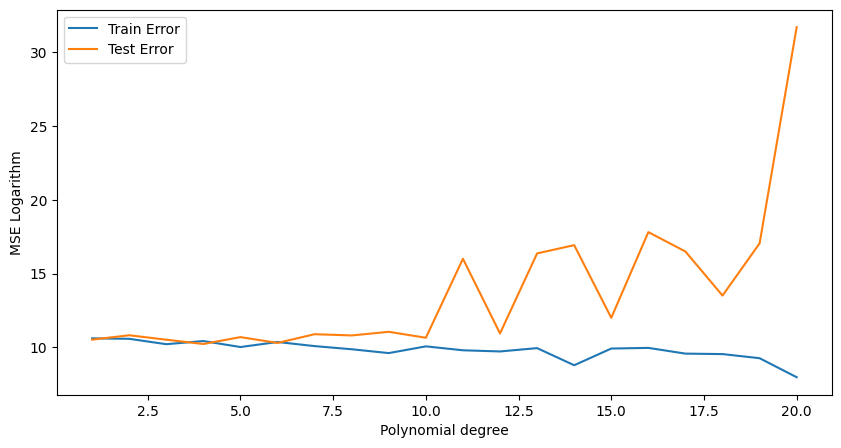

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
degrees = list(range(1, 21))

train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    phi_ds = poly.fit_transform(dataset)
    X_train, X_test, y_train, y_test = train_test_split(phi_ds, labels, test_size=0.5)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    h_train = model.predict(X_train)
    h_test = model.predict(X_test)

    train_error = np.log(mean_squared_error(y_train, h_train))
    test_error = np.log(mean_squared_error(y_test, h_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label='Train Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE Logarithm')
plt.legend()
# Rezultat će vjerojatno pokazati da pogreška učenja opada s povećanjem stupnja polinoma, dok ispitna pogreška može pokazati da raste nakon određenog stupnja polinoma. Ovo je tipičan primjer preprilagođenja (overfitting). Modeli s vrlo visokim stupnjevima polinoma imaju tendenciju pamćenja trening podataka i ne generaliziraju dobro na nove podatke, što rezultira visokom ispitnom pogreškom.
# Problem koji se može primijetiti prilikom pokretanja iscrtavanja više puta jest što će slučajna podjela na skup za učenje i skup za ispitivanje utjecati na rezultate. Ponekad će modeli s visokim stupnjem polinoma imati sreće s podjelom i izgledat će da dobro generaliziraju, dok u drugim slučajevima neće. Problem će biti izraženiji kad imate manje primjera jer će podjela biti osjetljivija na promjene u skupu podataka. S više primjera, podjela postaje manje osjetljiva jer će svaki skup sadržavati veći broj primjera za treniranje i testiranje, smanjujući varijabilnost rezultata.

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

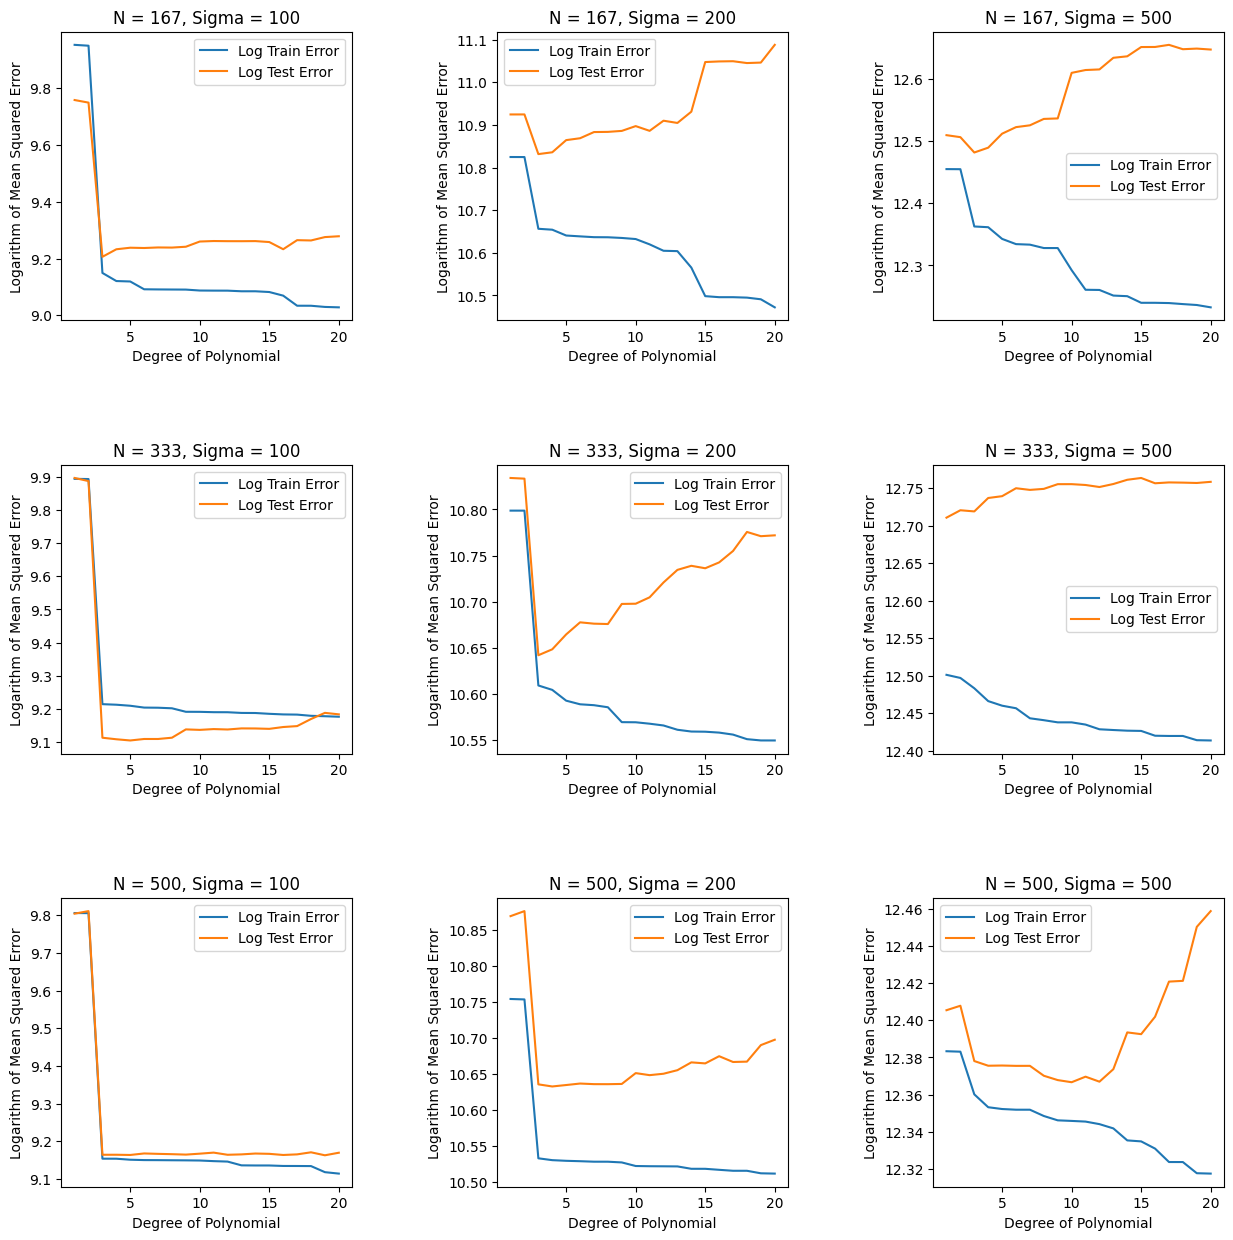

In [44]:
# Vaš kôd ovdje

degrees = list(range(1, 21))
noise_vals = [100, 200, 500]
partitions_num = 3

X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

model = LinearRegression()

fig, axes = plt.subplots(partitions_num, partitions_num, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(partitions_num):
    N = round(X_train.shape[0] * (i + 1) / partitions_num)
    X_train_subset = X_train[0:N]
    X_test_subset = X_test[0:N]
    for j, sigma in enumerate(noise_vals):
        train_errors, test_errors = [], []
        y_train = make_labels(X_train_subset, function, sigma)
        y_test = make_labels(X_test_subset, function, sigma)
        for degree in degrees:
            phi_train = PolynomialFeatures(degree=degree).fit_transform(X_train_subset)
            model.fit(phi_train, y_train)
            h_train = model.predict(phi_train)
            train_error = mean_squared_error(y_train, h_train)
            train_errors.append(np.log(train_error))
            
            phi_test = PolynomialFeatures(degree=degree).fit_transform(X_test_subset)
            h_test = model.predict(phi_test)
            test_error = mean_squared_error(y_test, h_test)
            test_errors.append(np.log(test_error))
            
        ax = axes[i, j]
        ax.set_title(f'N = {N}, Sigma = {sigma}')
        ax.set_xlabel('Degree of Polynomial')
        ax.set_ylabel('Logarithm of Mean Squared Error')
        ax.plot(degrees, train_errors, label='Log Train Error')
        ax.plot(degrees, test_errors, label='Log Test Error')
        ax.legend()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [110]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
reg_factors = [0, 1, 10]
phi = PolynomialFeatures(degree=3).fit_transform(X)
for _, l in enumerate(reg_factors):
    phi_t = np.transpose(phi)
    gram = np.dot(phi_t, phi)
    identity_matrix = np.eye(X.shape[0])
    reg_gram = gram + np.dot(l, identity_matrix)
    inv_gram = linalg.inv(reg_gram)
    w = np.dot(np.dot(inv_gram, phi_t), y)
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [21]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for _, l in enumerate(reg_factors):
    ridge = Ridge(alpha=l, fit_intercept=False)
    w = ridge.fit(phi, y)
    print(w.coef_)


[2.2        0.45714286]
[0.10187475 0.20071799]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

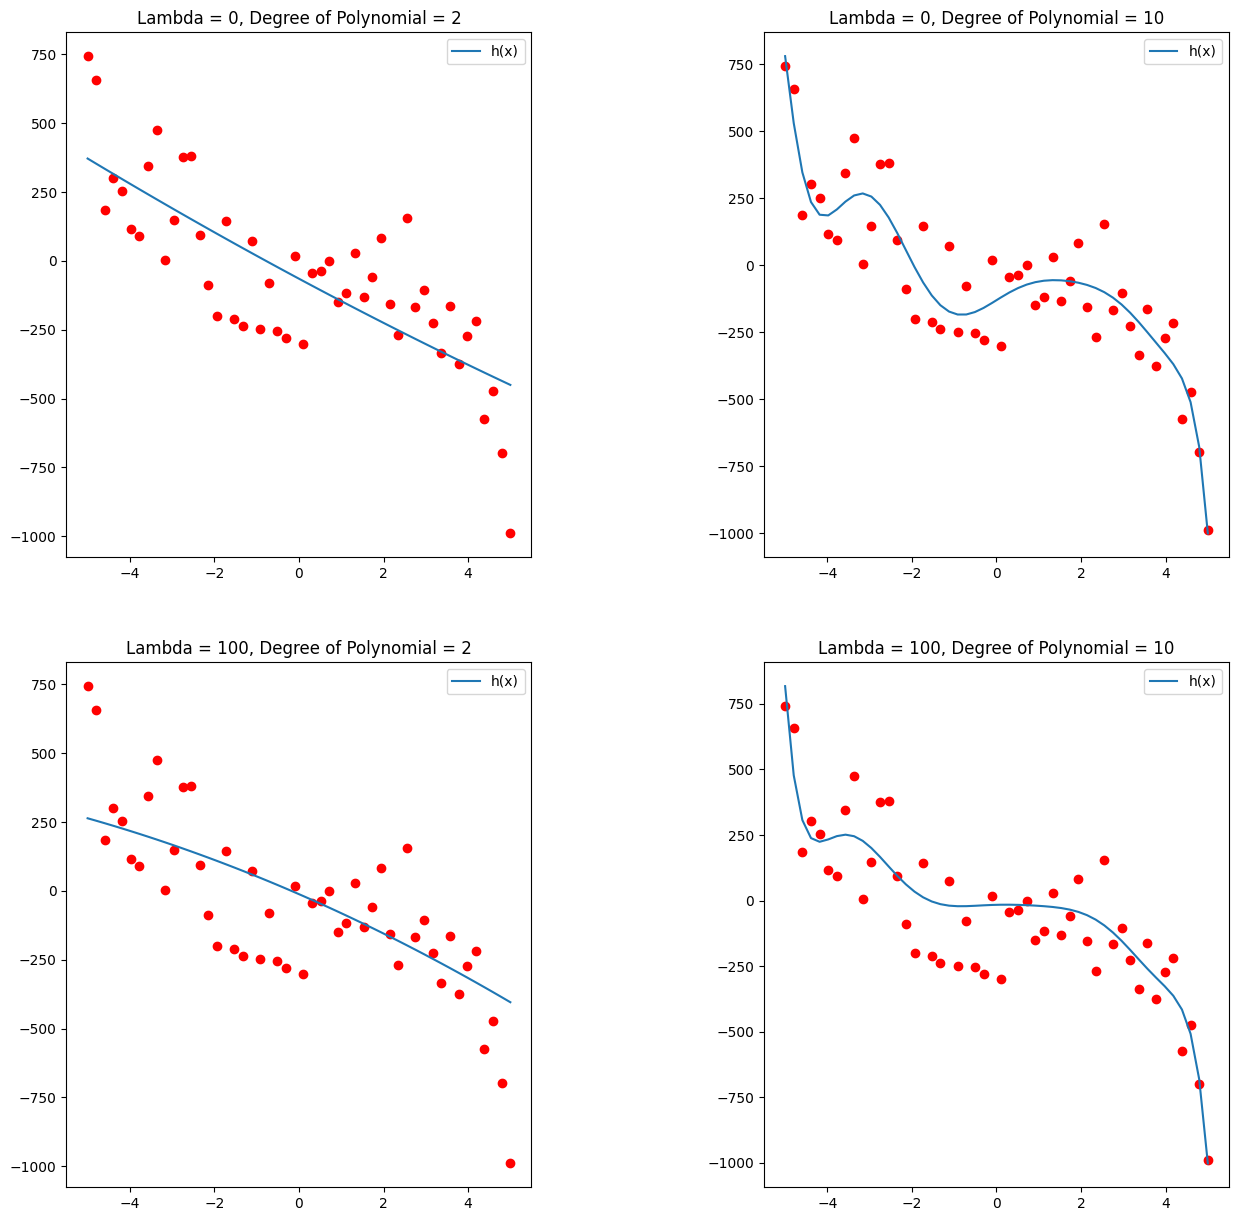

In [45]:
# Vaš kôd ovdje

reg_factors = [0, 100]
degrees = [2, 10]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.5)

for i, l in enumerate(reg_factors):
    ridge = Ridge(alpha=l, fit_intercept=False)
    for j, degree in enumerate(degrees):
        phi = PolynomialFeatures(degree=degree).fit_transform(dataset)
        ridge.fit(phi, labels)
        h = ridge.predict(phi)
        ax = axes[i, j]
        ax.set_title(f'Lambda = {l}, Degree of Polynomial = {degree}')
        ax.plot(dataset, h, label=f'h(x)')
        ax.scatter(dataset, labels, color='red')
        ax.legend()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


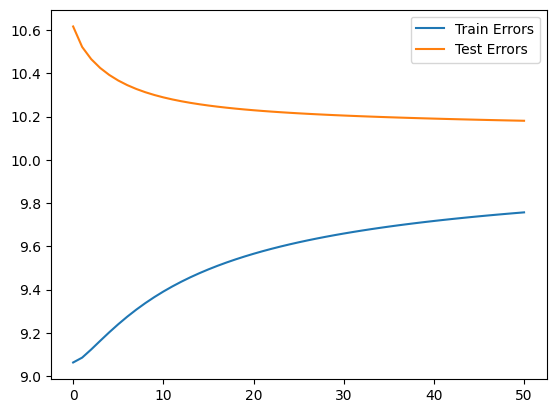

In [110]:
# Vaš kôd ovdje
degree = 10
reg_factors = list(range(0, 51))
train_errors, test_errors = [], []

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.5)

phi_train = PolynomialFeatures(degree=degree).fit_transform(X_train)
phi_test = PolynomialFeatures(degree=degree).fit_transform(X_test)

for _, l in enumerate(reg_factors):
    ridge = Ridge(alpha=l, fit_intercept=False).fit(phi_train, y_train)
    h_train = ridge.predict(phi_train)
    train_error = mean_squared_error(y_train, h_train)
    train_errors.append(np.log(train_error))
    
    h_test = ridge.predict(phi_test)
    test_error = mean_squared_error(y_test, h_test)
    test_errors.append(np.log(test_error))
    
plt.plot(reg_factors, train_errors, label='Train Errors')
plt.plot(reg_factors, test_errors, label='Test Errors')
plt.legend()
    

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [69]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

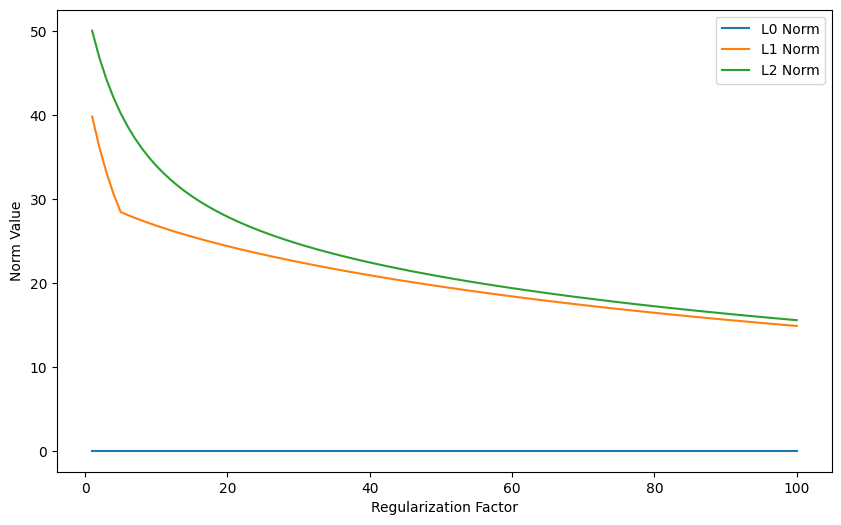

In [103]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
degree = 5
reg_factors = list(range(1, 101))
l0_norms, l1_norms, l2_norms = [], [], []
phi_train = PolynomialFeatures(degree=degree).fit_transform(X_train)

for _, l in enumerate(reg_factors):
    ridge = Ridge(alpha=l).fit(phi_train, y_train)
    w = ridge.coef_
    
    l0_norms.append(nonzeroes(w))
    #l1_norms.append(np.sum(np.absolute(w)))
    l1_norms.append(np.linalg.norm(w, ord=1))
    #l2_norms.append(np.sqrt(np.sum(np.square(w))))
    l2_norms.append(np.linalg.norm(w, ord=2))
    
plt.figure(figsize=(10, 6))
plt.plot(reg_factors, l0_norms, label='L0 Norm')
plt.plot(reg_factors, l1_norms, label='L1 Norm')
plt.plot(reg_factors, l2_norms, label='L2 Norm')
plt.xlabel('Regularization Factor')
plt.ylabel('Norm Value')
plt.legend()
    

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

C:\Users\mpavlovic\Documents\struce-lab1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.582e+02, tolerance: 2.646e+02
  model = cd_fast.enet_coordinate_descent(


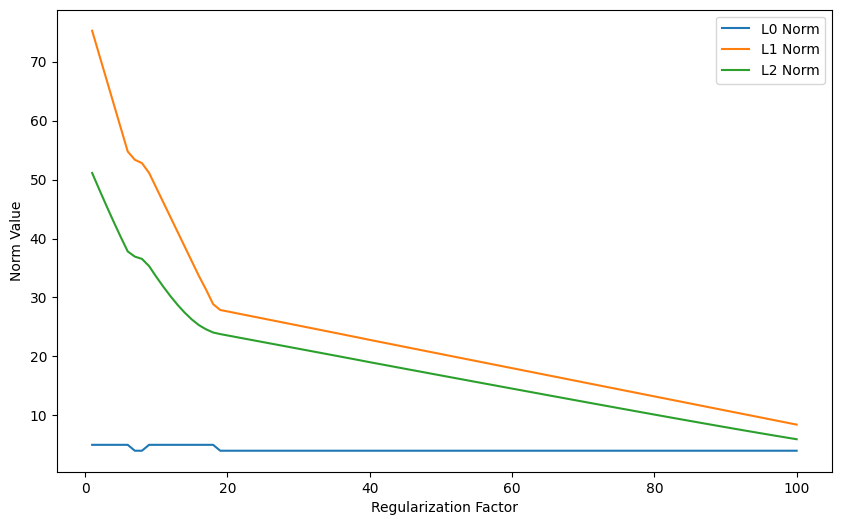

In [102]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

l0_norms.clear()
l1_norms.clear()
l2_norms.clear()

for _, l in enumerate(reg_factors):
    lasso = Lasso(alpha=l).fit(phi_train, y_train)
    w = lasso.coef_
    
    l0_norms.append(nonzeroes(w))
    l1_norms.append(np.linalg.norm(w, ord=1))
    l2_norms.append(np.linalg.norm(w, ord=2))
    
plt.figure(figsize=(10, 6))
plt.plot(reg_factors, l0_norms, label='L0 Norm')
plt.plot(reg_factors, l1_norms, label='L1 Norm')
plt.plot(reg_factors, l2_norms, label='L2 Norm')
plt.xlabel('Regularization Factor')
plt.ylabel('Norm Value')
plt.legend()


### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [93]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

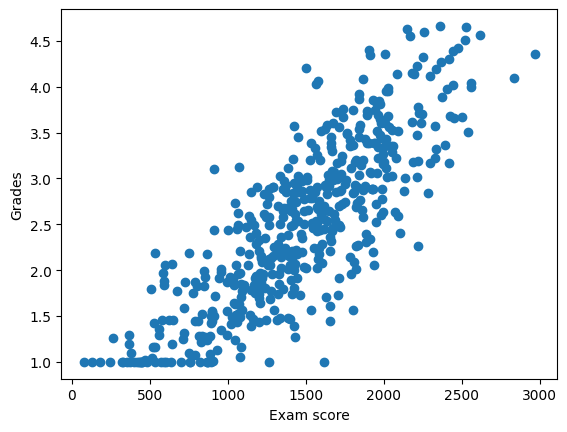

Text(0, 0.5, 'Grades')

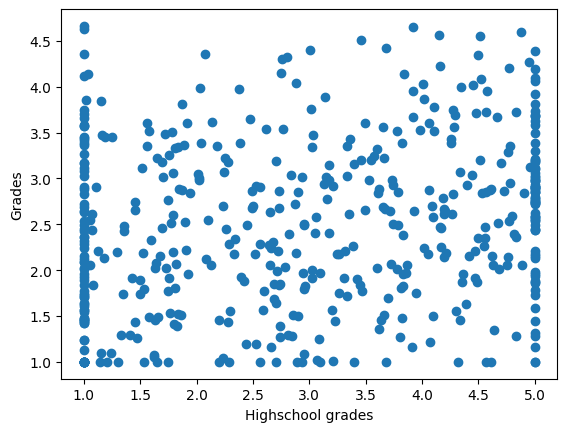

In [100]:
# Vaš kôd ovdje

plt.scatter(exam_score, grades_y)
plt.xlabel('Exam score')
plt.ylabel('Grades')
plt.show()
plt.scatter(grade_in_highschool, grades_y)
plt.xlabel('Highschool grades')
plt.ylabel('Grades')

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [101]:
# Vaš kôd ovdje
w = Ridge(alpha=0.01).fit(grades_X, grades_y)
print(w.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [112]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1, 1))

w = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y_fixed)
print(w.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [114]:
# Vaš kôd ovdje
# kod djelomično preuzet s https://www.geeksforgeeks.org/numpy-column_stack-in-python/
last_column = grades_X_fixed[:, -1]
grades_X_fixed_colinear = np.column_stack((grades_X_fixed, last_column))

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [115]:
# Vaš kôd ovdje
w = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(w.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.